### Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importação do Dataset

In [2]:
red_wines = pd.read_csv('datasets/red_wines.csv')

In [3]:
red_wines.head(5)

,Description,Price,Alcohol,ratings_average,acidity,intensity,sweetness,tannin,vintage_ratings_average,continent,popular_wine,popular_vintage,rating_group
0,"This is a soft, richly layered and concentrate...",85.0,14.5,4.3,3.468246,3.143860,1.546160,2.078285,4.4,North America,0,0,4
1,A strong showing of black cherry and licorice ...,125.0,14.5,4.5,3.344858,4.749089,1.611013,3.312963,4.5,North America,1,0,4
2,This blended cuvée features the same attention...,52.0,14.2,4.2,3.883377,2.235860,1.453785,2.130269,4.2,North America,1,0,3
3,This stands apart from the other estate Pinots...,95.0,14.5,4.4,3.887788,2.400275,1.558072,2.328298,4.4,North America,0,0,3
4,This wine impresses immediately with its flavo...,100.0,14.4,4.3,3.627241,2.472972,1.557877,2.073915,4.5,North America,0,0,3


### Preprocessing
 1. Criação de dummies para o campo **continent**.
 2. Separação dos datasets entre treinamento e teste (train_test_split)
 3. Normalização dos valores usando StandardScaler

In [4]:
# 1
dummies = pd.get_dummies(red_wines['continent'], drop_first=True)
red_wines = pd.concat([red_wines, dummies], axis=1).drop('continent', axis=1)

In [5]:
# 2
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
description_vectorizer = vectorizer.fit_transform(red_wines['Description'])
descriptions = pd.DataFrame(description_vectorizer.toarray())

red_wines = pd.concat([red_wines, descriptions], axis=1).drop('Description', axis=1)

In [6]:
# 3
X = red_wines.drop('rating_group', axis=1)
y = red_wines['rating_group']

In [7]:
# 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_columns =['Price', 'Alcohol', 'ratings_average', 'acidity', 'intensity', 'sweetness',
                  'tannin', 'vintage_ratings_average']
X_train.loc[:, scaled_columns]= scaler.fit_transform(X_train.loc[:, scaled_columns])
X_test.loc[:, scaled_columns] = scaler.transform(X_test.loc[:, scaled_columns])

C:\Users\HAL9000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\HAL9000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### SGD Classifier Model

In [8]:
from sklearn.linear_model import SGDClassifier
base_model = SGDClassifier()


#### GridSearch - busca pelos melhores hiperparâmetros

In [9]:
# Parâmetros
param_grid = {
    "loss" : ["hinge", "perceptron", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

In [10]:
from sklearn.model_selection import GridSearchCV

sgd_model = GridSearchCV(base_model,param_grid=param_grid, verbose=4)
sgd_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ...........alpha=0.0001, loss=hinge, penalty=l2; total time= 2.2min
[CV 2/5] END ...........alpha=0.0001, loss=hinge, penalty=l2; total time= 1.7min
[CV 3/5] END ...........alpha=0.0001, loss=hinge, penalty=l2; total time= 1.5min
[CV 4/5] END ...........alpha=0.0001, loss=hinge, penalty=l2; total time= 1.7min
[CV 5/5] END ...........alpha=0.0001, loss=hinge, penalty=l2; total time= 1.7min
[CV 1/5] END ...........alpha=0.0001, loss=hinge, penalty=l1; total time= 3.5min
[CV 2/5] END ...........alpha=0.0001, loss=hinge, penalty=l1; total time= 3.4min
[CV 3/5] END ...........alpha=0.0001, loss=hinge, penalty=l1; total time= 3.1min
[CV 4/5] END ...........alpha=0.0001, loss=hinge, penalty=l1; total time= 3.3min
[CV 5/5] END ...........alpha=0.0001, loss=hinge, penalty=l1; total time= 2.7min
[CV 1/5] END .........alpha=0.0001, loss=hinge, penalty=none; total time= 1.9min
[CV 2/5] END .........alpha=0.0001, loss=hinge,

[CV 2/5] END ...........alpha=0.01, loss=hinge, penalty=none; total time=  40.5s
[CV 3/5] END ...........alpha=0.01, loss=hinge, penalty=none; total time=  39.0s
[CV 4/5] END ...........alpha=0.01, loss=hinge, penalty=none; total time=  37.2s
[CV 5/5] END ...........alpha=0.01, loss=hinge, penalty=none; total time=  34.4s
[CV 1/5] END ........alpha=0.01, loss=perceptron, penalty=l2; total time=  23.7s
[CV 2/5] END ........alpha=0.01, loss=perceptron, penalty=l2; total time=  24.2s
[CV 3/5] END ........alpha=0.01, loss=perceptron, penalty=l2; total time=  24.6s
[CV 4/5] END ........alpha=0.01, loss=perceptron, penalty=l2; total time=  25.6s
[CV 5/5] END ........alpha=0.01, loss=perceptron, penalty=l2; total time=  24.6s
[CV 1/5] END ........alpha=0.01, loss=perceptron, penalty=l1; total time=  50.3s
[CV 2/5] END ........alpha=0.01, loss=perceptron, penalty=l1; total time=  49.8s
[CV 3/5] END ........alpha=0.01, loss=perceptron, penalty=l1; total time=  50.9s
[CV 4/5] END ........alpha=0

C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


[CV 4/5] END .....alpha=0.1, loss=modified_huber, penalty=l1; total time=16.7min
[CV 5/5] END .....alpha=0.1, loss=modified_huber, penalty=l1; total time= 1.1min
[CV 1/5] END ...alpha=0.1, loss=modified_huber, penalty=none; total time= 1.1min
[CV 2/5] END ...alpha=0.1, loss=modified_huber, penalty=none; total time= 1.2min
[CV 3/5] END ...alpha=0.1, loss=modified_huber, penalty=none; total time=  56.7s
[CV 4/5] END ...alpha=0.1, loss=modified_huber, penalty=none; total time= 1.2min
[CV 5/5] END ...alpha=0.1, loss=modified_huber, penalty=none; total time= 1.7min


GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'perceptron', 'modified_huber'],
                         'penalty': ['l2', 'l1', 'none']},
             verbose=4)

In [11]:
sgd_model.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}

In [12]:
# Resultados
print("Best: {} using {}".format(sgd_model.best_score_, sgd_model.best_params_))
means = sgd_model.cv_results_['mean_test_score']
stds = sgd_model.cv_results_['std_test_score']
params = sgd_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.6355155768261131 using {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
0.6355155768261131 (0.006760567539885955) with: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
0.6289554440071464 (0.008003444284865442) with: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
0.6176322728362305 (0.008451009782250636) with: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'none'}
0.5640755396065734 (0.017722148378463278) with: {'alpha': 0.0001, 'loss': 'perceptron', 'penalty': 'l2'}
0.5205858653129712 (0.0418654850977782) with: {'alpha': 0.0001, 'loss': 'perceptron', 'penalty': 'l1'}
0.5978039290703263 (0.0064308186255500575) with: {'alpha': 0.0001, 'loss': 'perceptron', 'penalty': 'none'}
0.6181174139504787 (0.0031014222351114784) with: {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l2'}
0.6148129517385847 (0.005664855125649298) with: {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l1'}
0.5938185098722703 (0.005798974151357518) with: {'alpha': 0.0001, 'loss': 'modif

#### Avaliação do modelo

In [13]:
y_pred = sgd_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
train_acc = accuracy_score(y_train, sgd_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print('Acurácia (treinamento): {}'.format(train_acc))
print('Acurácia (teste): {}'.format(test_acc))

Acurácia (treinamento): 0.7295038149390096
Acurácia (teste): 0.6466719582719129


Text(0.5, 1.0, 'Matriz de confusão - SGD Classifier Model')

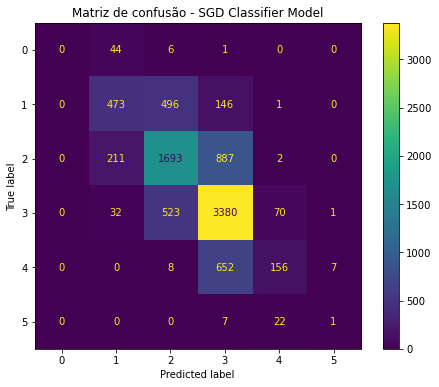

In [14]:
# Gráfico de matriz de confusão
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(sgd_model, X_test,y_test, ax=ax)
plt.title('Matriz de confusão - SGD Classifier Model')

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.62      0.42      0.50      1116
           2       0.62      0.61      0.61      2793
           3       0.67      0.84      0.74      4006
           4       0.62      0.19      0.29       823
           5       0.11      0.03      0.05        30

    accuracy                           0.65      8819
   macro avg       0.44      0.35      0.37      8819
weighted avg       0.64      0.65      0.62      8819



C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HAL9000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Exportação do modelo

In [16]:
import joblib
joblib.dump(sgd_model, 'models/sgd_model.joblib')


['models/sgd_model.joblib']